In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #for data visualization and graphical plotting.
from matplotlib import style      #for styling the plot.
style.use("ggplot")

import nltk
from nltk.util import pr
from nltk.tokenize import word_tokenize      #to separate strings into substring lists.
from nltk.stem import WordNetLemmatizer      #to connect terms that have a meaning with one another (synonyms).


from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import re
import string

In [89]:
from nltk.corpus import stopwords
nltk.download('stopwords')  # To Download the stopwords

stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the Dataset

In [88]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#Importing the Data from MyDrive.
data = pd.read_csv("/content/drive/MyDrive/nlptask1/labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Data Information

In [86]:
# to learn more about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   labels              24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [85]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


Adding  a new column to this dataset as labels which will contain the values as:

1. Hate Speech
2. Offensive Language
3. No Hate and Offensive

In [99]:
# Mapping the dataframe
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


In [97]:
# examining certain data
print(data["tweet"].iloc[0],"\n")
print(data["tweet"].iloc[1],"\n")
print(data["tweet"].iloc[2],"\n")
print(data["tweet"].iloc[3],"\n")
print(data["tweet"].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



Now we only select the tweet and labels columns for the rest of the task of training a hate speech detection model:

In [100]:
data = data[["tweet", "labels"]]
data.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


## Data Preprocessing

In [101]:
# To Filter Out the Dataset.
def filter(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
    return " ".join(filtered_tweets)

In [102]:
# putting text data through pre-processing.
import nltk
nltk.download('punkt')
data.tweet=data['tweet'].apply(filter)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [103]:
# Droping the duplicate data.
tweetData = data.drop_duplicates("tweet")

In [104]:
# as duplicate entries are eliminated, to view the updated number of columns
tweetData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24506 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24506 non-null  object
 1   labels  24506 non-null  object
dtypes: object(2)
memory usage: 574.4+ KB


In [105]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(data):
    tweet=[lemmatizer.lemmatize(word) for word in data]
    return data

In [106]:
#reducing the size of  the data that has been processed
import nltk
nltk.download('wordnet')
tweetData['tweet']=tweetData['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
# To view the data after its been Pre-processed
print(tweetData["tweet"].iloc[0],"\n")
print(tweetData["tweet"].iloc[1],"\n")
print(tweetData["tweet"].iloc[2],"\n")
print(tweetData["tweet"].iloc[3],"\n")
print(tweetData["tweet"].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt boy dats coldtyga dwn bad cuffin dat hoe place 

rt urkindofbrand dawg rt ever fuck bitch start cry confused shit 

rt cganderson vivabased look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 



In [108]:
# to view the  distribution of labels
tweetData['labels'].value_counts()

Offensive Language       18984
No Hate and Offensive     4113
Hate Speech               1409
Name: labels, dtype: int64

# Data Visualization


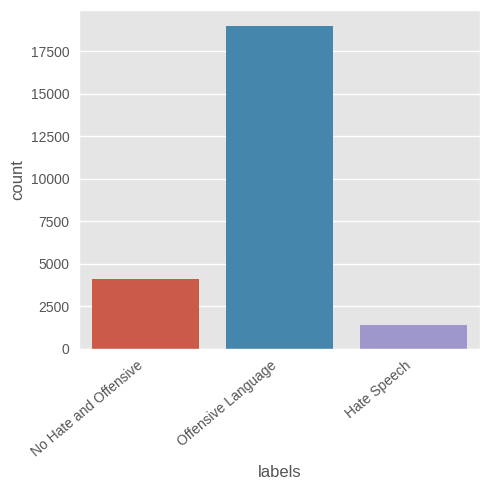

In [109]:
# using  a count plot to display the data
fig = plt.figure(figsize=(5,5))
ax = sns.countplot(x='labels', data=tweetData)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of sentiments')

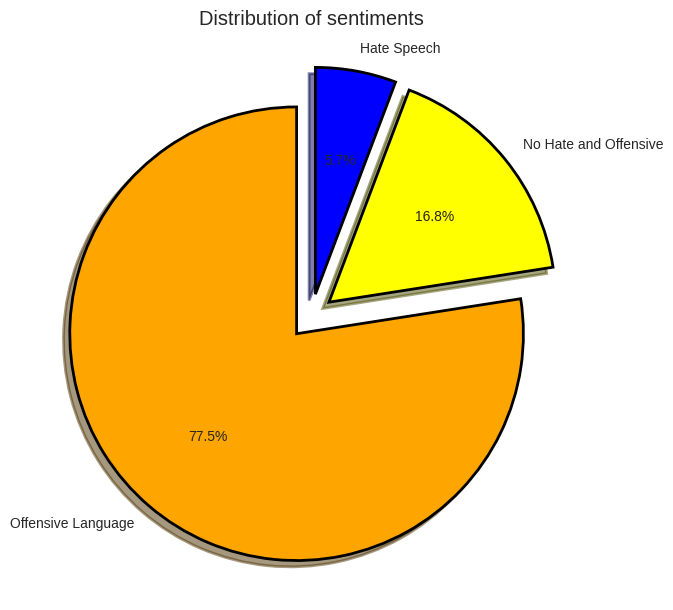

In [110]:
#Piechart data visualisation
fig = plt.figure(figsize=(7,7))
colors = ('orange', 'yellow', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = tweetData['labels'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of sentiments")

#here 0 indicates hate speech, 1 indicates offensive Language & 2 indicates no hate & offensive

In [111]:
#illustrating tweets  of hate speech detection
non_hate_tweets = tweetData[tweetData.labels=='No Hate and Offensive']
non_hate_tweets.head()

,tweet,labels
0,rt mayasolovely woman shouldnt complain cleani...,No Hate and Offensive
40,momma said pussy cats inside doghouse,No Hate and Offensive
63,simplyaddictedtoguys woof woof hot scally lad,No Hate and Offensive
66,allaboutmanfeet woof woof hot soles,No Hate and Offensive
67,allyhaaaaa lemmie eat oreo amp dishes one oreo...,No Hate and Offensive


In [112]:
#to obtain value counts for no hate and offensive speech
non_hate_tweets.value_counts()

tweet                                                                                                           labels               
                                                                                                                No Hate and Offensive    1
rt joleendoreen kik group called party line old charlie barber always hogging calls                             No Hate and Offensive    1
rt kickin trash cans golf cart yeeyee jbilinovich                                                               No Hate and Offensive    1
rt kickman giants pitiful jetspitiful mets pitiful yankeespitiful nets pitiful knickspitiful ny sports pitiful  No Hate and Offensive    1
rt kid listened nas showed new perspective coming ghetto like pimp c                                            No Hate and Offensive    1
                                                                                                                                        ..
jstarrtweets took harder rivera 

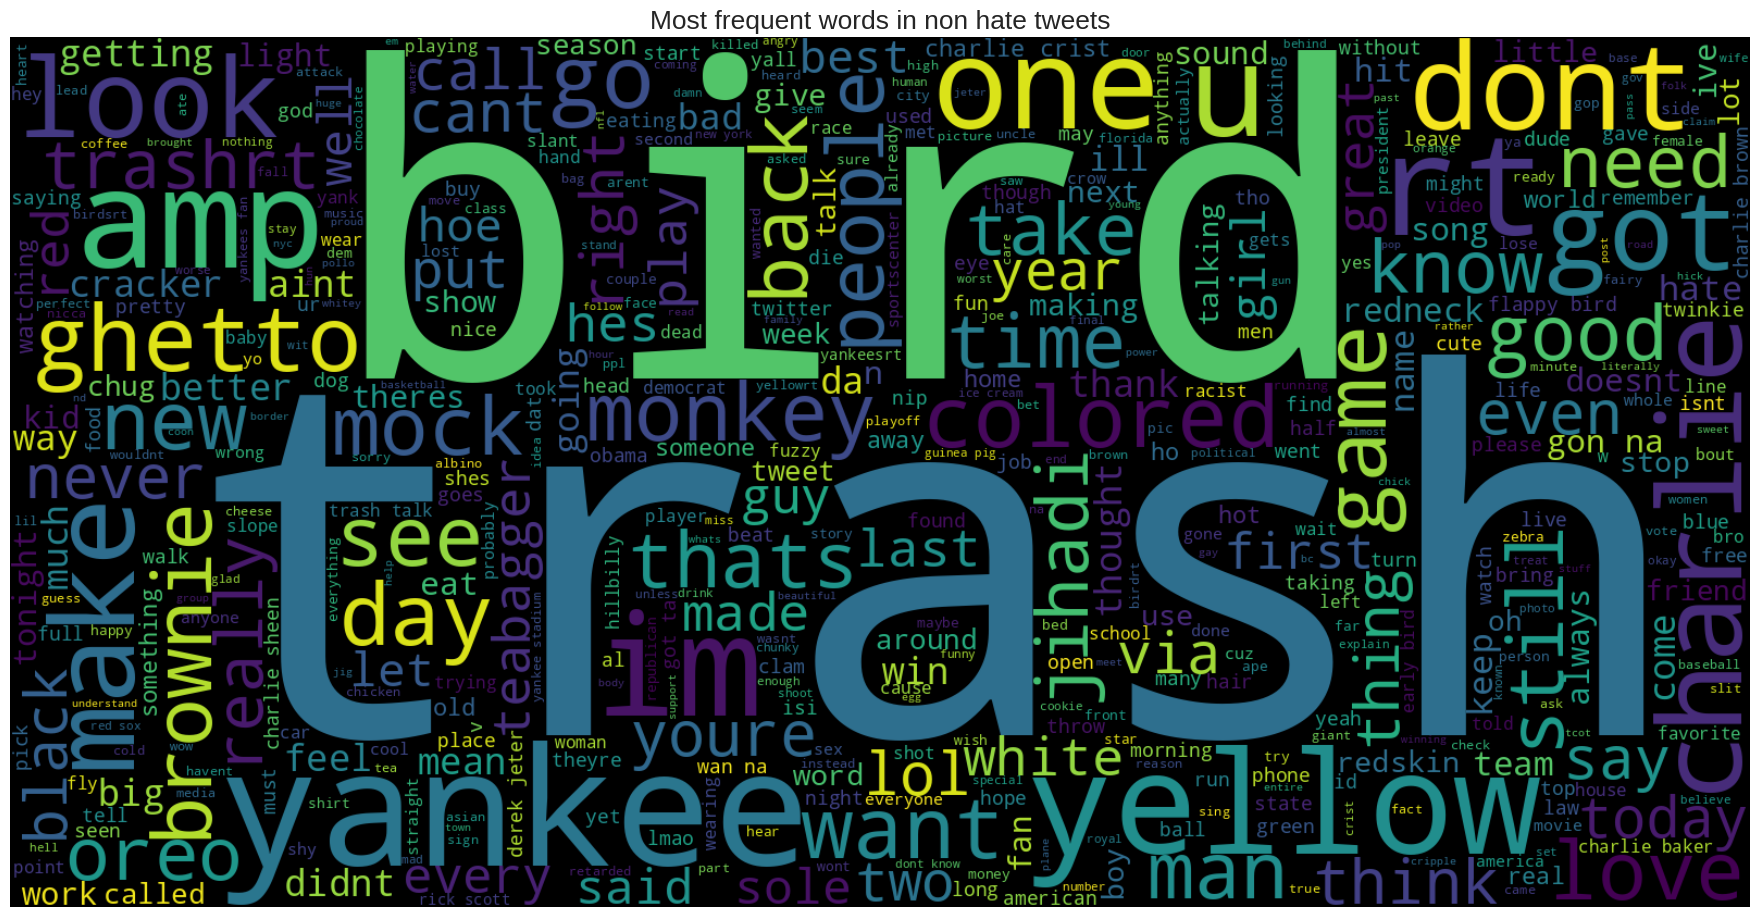

In [113]:
#  utilising a word cloud to visualise non-hate tweets
text=''.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate tweets", fontsize=19)
plt.show()

**TF - IDF: Term frequence - Inverse Document Frequency**

    TF-IDF = TF(t,d) x IDF(t),
    where TF(t,d) = number of times term "t" appears in a document "d".
          IDF(t) = inverse document frequency of the term t

The TF-IDF vectorizer converts a collection of raw documents into a matrix of TF-IDF features.

* **Bigram model**: provides probability of the next word given the past two words.
* **Trigram model**: provides probability of the next word based on past three words.
* **N-gram model**: provides probability based on past N-words.

### TF-IDF Bigram Model

In [47]:
# using TfidVectorizer to vectorize the text data and produce a bigram language model

vect=TfidfVectorizer(ngram_range=(1,2)).fit(tweetData['tweet'])

In [48]:
# to output the vectorized dataset's count of features along with the names of the first 20 features.
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 161774
First 200 features: 
 ['aa' 'aa classes' 'aa lol' 'aaaaaaaaand' 'aaaaaaaaand begins' 'aaahhhhh'
 'aaahhhhh internet' 'aahahah' 'aahahah fuck' 'aaliyah' 'aaliyah curving'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhlovee' 'aaliyahhlovee yu'
 'aamaadmiparty' 'aamaadmiparty mix' 'aampt' 'aampt ackin' 'aamu']


### TF-IDF Trigram Model

In [49]:
#constructing a trigram-based language model.
vect=TfidfVectorizer(ngram_range=(1,3)).fit(tweetData['tweet'])

In [50]:
# to output the vectorized dataset's count of features along with the names of the first 20 features.
feature_names=vect.get_feature_names_out()
print("Number of features: {}\n", format(len(feature_names)))
print("First 200 features: \n", format(feature_names[:20]))

Number of features: {}
 310426
First 200 features: 
 ['aa' 'aa classes' 'aa classes bc' 'aa lol' 'aa lol gduenez' 'aaaaaaaaand'
 'aaaaaaaaand begins' 'aaaaaaaaand begins rt' 'aaahhhhh'
 'aaahhhhh internet' 'aaahhhhh internet died' 'aahahah' 'aahahah fuck'
 'aahahah fuck watches' 'aaliyah' 'aaliyah curving' 'aaliyah curving low'
 'aaliyahhhm' 'aaliyahhhm knowww' 'aaliyahhhm knowww righttt']


## Split Dataset

In [51]:
#splitting the data into x and y to build the model
X = tweetData['tweet']
Y = tweetData['labels']
X = vect.transform(X) #converting the x data


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
 # The size of the testing and training data is printed

print("Size of X_train", (X_train.shape))
print("Size of Y_train", (Y_train.shape))
print("Size of X_test", (X_test.shape))
print("Size of Y_test", (Y_test.shape))

Size of X_train (19604, 310426)
Size of Y_train (19604,)
Size of X_test (4902, 310426)
Size of Y_test (4902,)


## Model Training & Testing

### 1. Logistic Regression

In [54]:
#In order to train the logistic regression model with the data
logreg = LogisticRegression()
# Data loading for x_train and y_train on the model
logreg.fit(X_train, Y_train)
#estimating the test data value
logreg_predict = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_predict, Y_test)

In [55]:
#Getting the  accuracy of the model.
print("Test accuracy: {:.2f}%".format(logreg_acc*100))



Test accuracy: 85.31%


In [56]:
# generating a classification report and confusion matrix.
print(confusion_matrix(Y_test, logreg_predict))
print("\n")
print(classification_report(Y_test, logreg_predict))

[[  12   10  261]
 [   0  403  405]
 [   3   41 3767]]


                       precision    recall  f1-score   support

          Hate Speech       0.80      0.04      0.08       283
No Hate and Offensive       0.89      0.50      0.64       808
   Offensive Language       0.85      0.99      0.91      3811

             accuracy                           0.85      4902
            macro avg       0.85      0.51      0.54      4902
         weighted avg       0.85      0.85      0.82      4902



<ipython-input-57-6fa64f4756d9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


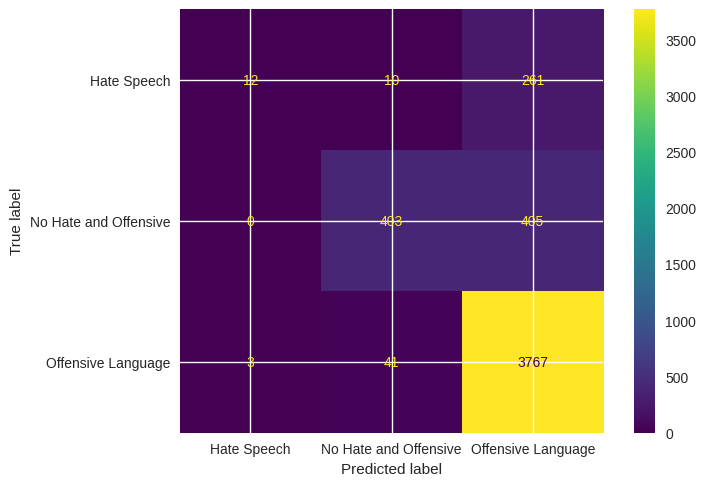

In [57]:
# TO  Display the  confusion matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')
cm = confusion_matrix(Y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

### Hyperparameter Tuning - GridSearchCV

In [58]:
#To execute hyperparameter adjustments
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [61]:
#To output both the optimal hyperparameters discovered during the search and the best cross-validation score.

param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(X_train, Y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.88
Best parameters:  {'C': 100, 'solver': 'lbfgs'}


In [62]:
log_grid_pred = grid.predict(X_test)

In [63]:
#printing model accuracy after applying hyperparamenter tuning
log_grid_acc = accuracy_score(log_grid_pred, Y_test)
print("Test accuracy: {:.2f}%".format(log_grid_acc*100))

Test accuracy: 89.17%


In [64]:

print(confusion_matrix(Y_test, log_grid_pred))
print("\n")
print(classification_report(Y_test, log_grid_pred))

[[  29   17  237]
 [   2  626  180]
 [  19   76 3716]]


                       precision    recall  f1-score   support

          Hate Speech       0.58      0.10      0.17       283
No Hate and Offensive       0.87      0.77      0.82       808
   Offensive Language       0.90      0.98      0.94      3811

             accuracy                           0.89      4902
            macro avg       0.78      0.62      0.64      4902
         weighted avg       0.88      0.89      0.87      4902



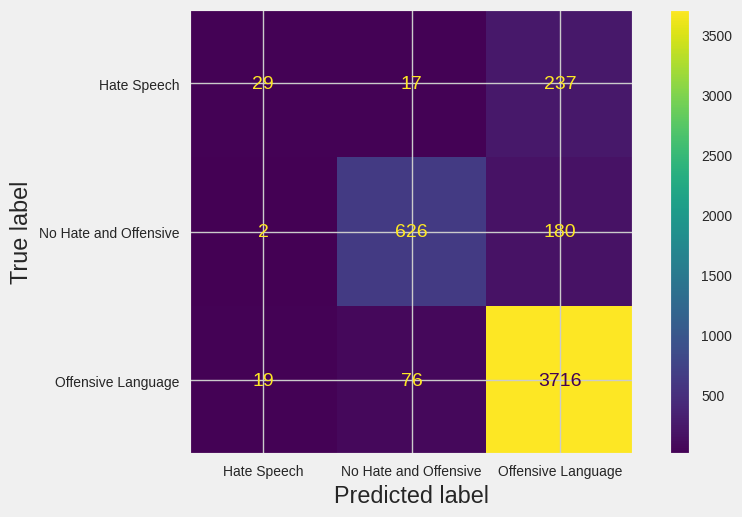

In [65]:
# To display confusion matrix
plt.style.use('fivethirtyeight')
cm = confusion_matrix(Y_test, log_grid_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()
plt.show()

### 2. Decision Tree Classifier

In [66]:
# To train the data on decision tree classifier model
dtree = DecisionTreeClassifier()
#loading x_train and y_train data on model
dtree.fit(X_train, Y_train)
#predicting the value for test data
dtree_predict = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_predict, Y_test)

In [67]:
# Displaying accuracy of the DescicionTreeClassifier model
print("Test accuracy: {:.2f}%".format(dtree_acc*100))


Test accuracy: 87.74%


In [68]:
# Confusion matrix and classification report printing

print(confusion_matrix(Y_test, dtree_predict))
print("\n")
print(classification_report(Y_test, dtree_predict))

[[  56   38  189]
 [  23  683  102]
 [  83  166 3562]]


                       precision    recall  f1-score   support

          Hate Speech       0.35      0.20      0.25       283
No Hate and Offensive       0.77      0.85      0.81       808
   Offensive Language       0.92      0.93      0.93      3811

             accuracy                           0.88      4902
            macro avg       0.68      0.66      0.66      4902
         weighted avg       0.87      0.88      0.87      4902



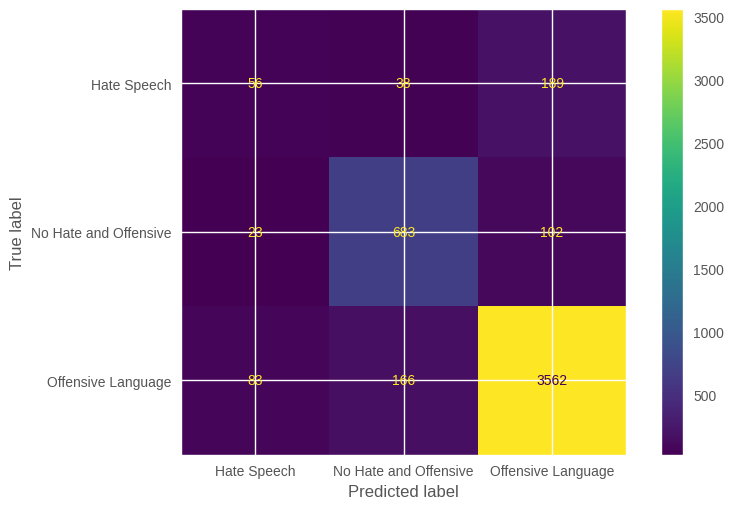

In [69]:
# TO Display confusion matrix
plt.style.use('ggplot')
cm = confusion_matrix(Y_test, dtree_predict, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()
plt.show()

In [70]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [71]:
# To use the model in action.
import streamlit as st
def hate_speech_detection():
  st.title("Hate Speech Detection")
  user = st.text_area("Enter any Tweet: ")
  if len(user) < 1:
    st.write(" ")
  else:
      sample = user
      data = cv.transform([sample]).toarray()
      a = clf.predict(data)
      st.title(a)
      hate_speech_detection()
